本篇主要運用Python兩個資料視覺化函式庫Matplotlib以及Seaborn兩種工具，

一、Matplotlib

﹒Matplotlib 同時也是經典的 Python 視覺化繪圖庫， Matplotlib 就是 MATLAB + Plot + Library 的簡稱，因為是模仿 MATLAB 建立的繪圖庫，所以繪圖風格與 MATLAB 有點類似。
．能處理幾乎所有二維以及三維的資料視覺化圖形
．自定義程度高，能夠自由調整各類參數決定圖形的呈現、標籤

1. 載入套件

In [3]:
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

2. 載入資料

本份檔案包含不同類別鋼鐵的資料，包含長度、亮度、面積等資訊
鋼鐵的類別為: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults。此處想了解各種鋼鐵類別間，是否有因為不同的屬性差異造成不同分類結果，或者是屬性之間有相關性，因此用視覺化方式呈現

In [5]:
df = pd.read_csv('faults_1.csv')
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


3. 資料預處理

In [7]:
# 設定條件清單
conditions = [
    (df['Pastry'] == 1) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 0) & (df['Stains'] == 0) & (df['Dirtiness'] == 0) & (df['Bumps'] == 0) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 1) & (df['K_Scatch'] == 0) & (df['Stains'] == 0) & (df['Dirtiness'] == 0) & (df['Bumps'] == 0) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 1) & (df['Stains'] == 0) & (df['Dirtiness'] == 0) & (df['Bumps'] == 0) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 0) & (df['Stains'] == 1) & (df['Dirtiness'] == 0) & (df['Bumps'] == 0) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 0) & (df['Stains'] == 0) & (df['Dirtiness'] == 1) & (df['Bumps'] == 0) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 0) & (df['Stains'] == 0) & (df['Dirtiness'] == 0) & (df['Bumps'] == 1) & (df['Other_Faults'] == 0),
    (df['Pastry'] == 0) & (df['Z_Scratch'] == 0) & (df['K_Scatch'] == 0) & (df['Stains'] == 0) & (df['Dirtiness'] == 0) & (df['Bumps'] == 0) & (df['Other_Faults'] == 1)
]

# 設定選項清單
choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['class'] = np.select(conditions, choices)

# 刪除多餘columns
drp_cols = ['TypeOfSteel_A400','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,class
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0026,0.7254,0,0,0,0,0,0,1,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.0582,0.8173,0,0,0,0,0,0,1,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0052,0.7079,0,0,0,0,0,0,1,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0171,0.9919,0,0,0,0,0,0,1,Other_Faults


4. 繪圖
以下以matplotlib中五種圖形的使用與語法，並以上述鋼鐵資料集來做為範例


1.直方圖：plt.hist(x)
2.長條圖：plt.bar(x, y)
3.散佈圖：plt.scatter(x, y)
4.盒狀圖：plt.boxplot(x, y)
5.折線圖：plt.plot(x, y)

直方圖

直方圖 (histogram)常被用來表達一組連續值資料的分布
以下以我們觀察在資料集當中的"最小亮度"的分布情形

<function matplotlib.pyplot.show(close=None, block=None)>

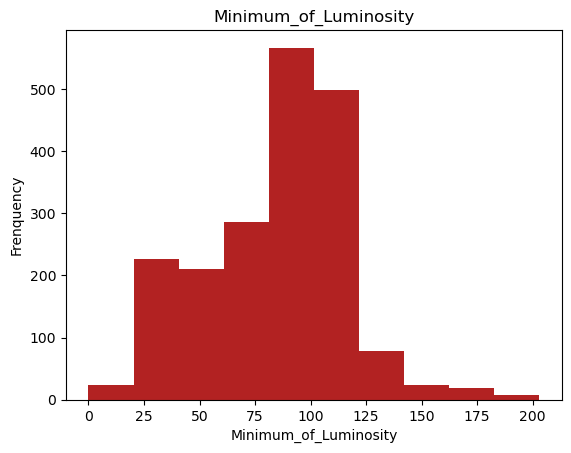

In [19]:
plt.hist(df["Minimum_of_Luminosity"], bins = 10, color = 'firebrick')# 畫出直方圖，bins為區間數
plt.xlabel("Minimum_of_Luminosity")# .xlabel是x軸
plt.ylabel("Frenquency")# .ylabel是y軸
plt.title("Minimum_of_Luminosity")# .title替圖片取名
plt.show

疊加直方圖

常用情境：比較不同類別的數據在某一特徵上的分佈。
例如：各種類型鋼鐵的最小亮度分佈。
不同產品銷售量的分佈。